## [Desicion Tree](https://www.displayr.com/what-is-a-decision-tree/)

![Decision Tree](./assets/decision_tree.png)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:

URL:str =r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTVjHDHSf0d-qpQZrqCIlynVf0KkqZ8MEloq1OF0SOsAXquEBfGXAfKFWv1917fwAbjcxZn4wv8XX7K/pub?gid=333071130&single=true&output=csv"

poblacion_india_df = pd.read_csv(URL, encoding="utf8",sep=",")

poblacion_india_df.columns=poblacion_india_df.columns.str.lower()

df = poblacion_india_df.loc[:, ["glucose", "bmi", "age", "pregnancies","outcome"]]

In [58]:
target = 'outcome'
X = df.drop(target, axis=1)
y = df[target]

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de vuelta a DataFrame manteniendo nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [62]:
arbol = DecisionTreeClassifier(max_depth=3)  # límite de profundidad
arbol.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:

predicciones = arbol.predict(X_test)
precision = accuracy_score(y_test, predicciones)
print(f"Precisión: {precision*100:.1f}%")


Precisión: 76.0%


In [64]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

# Predicciones
predicciones = arbol.predict(X_test)

# Precisión
precision = accuracy_score(y_test, predicciones)
print(f"Precisión: {precision*100:.1f}%")

# Otras métricas importantes
print(f"Precisión (Precision): {precision_score(y_test, predicciones)*100:.1f}%")
print(f"Sensibilidad (Recall): {recall_score(y_test, predicciones)*100:.1f}%")
print(f"F1-Score: {f1_score(y_test, predicciones)*100:.1f}%")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, predicciones))

# Reporte completo de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones))

Precisión: 76.0%
Precisión (Precision): 68.0%
Sensibilidad (Recall): 61.8%
F1-Score: 64.8%

Matriz de Confusión:
[[83 16]
 [21 34]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



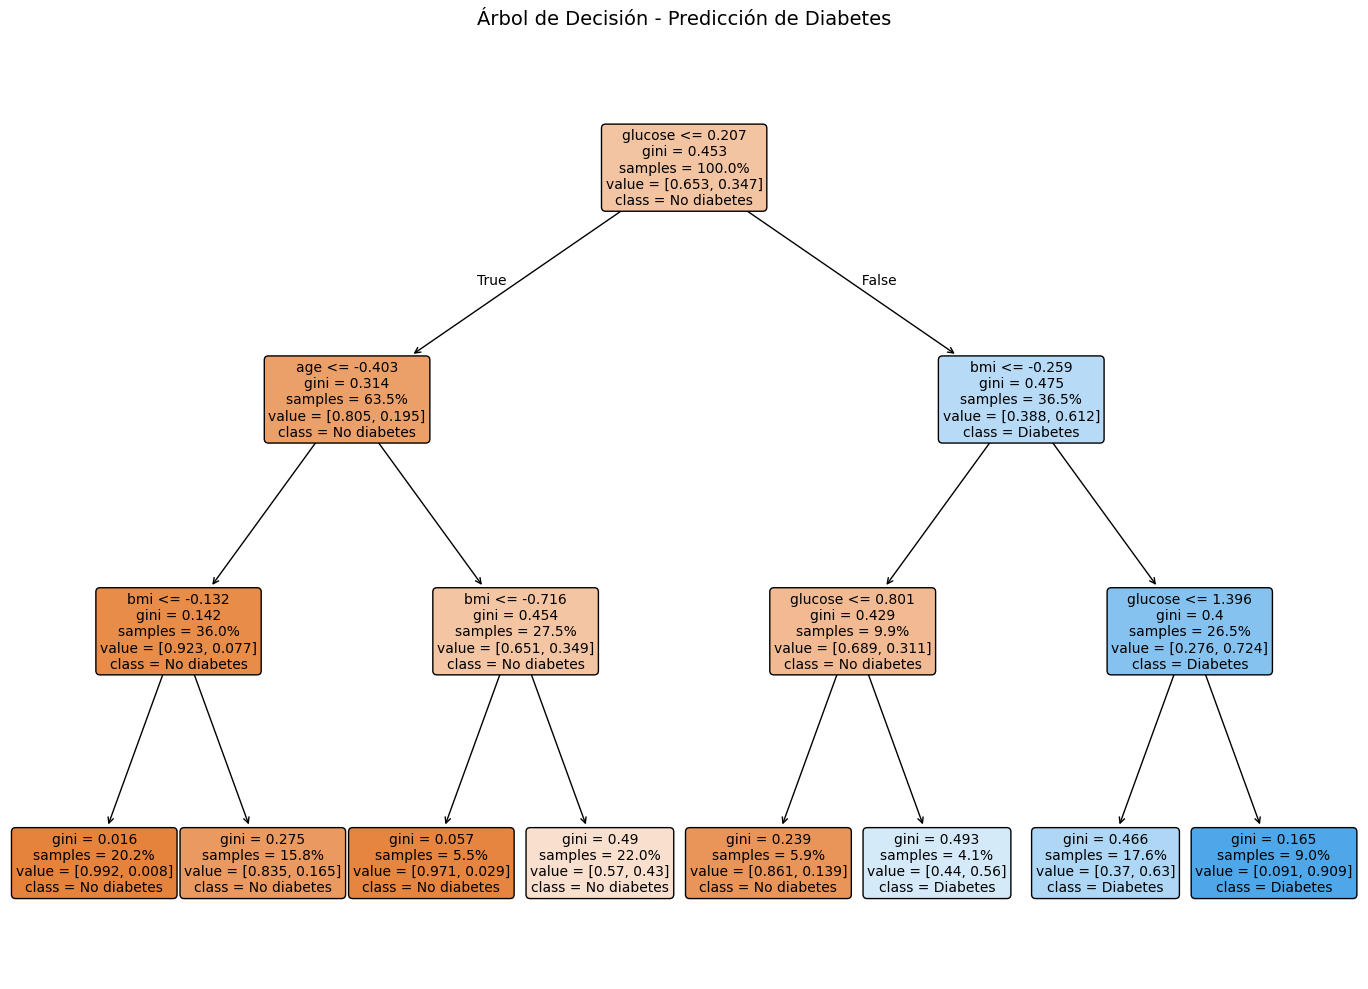

In [65]:
plt.figure(figsize=(14,10))
tree.plot_tree(arbol, 
               feature_names=X.columns,
               class_names=['No diabetes', 'Diabetes'],
               filled=True,
               fontsize=10,
               rounded=True,
               proportion=True)  # Muestra proporciones en lugar de conteos
plt.title("Árbol de Decisión - Predicción de Diabetes", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [66]:
# Crear DataFrame comparativo
resultados = pd.DataFrame({
    'Valor_Real': y_test,
    'Prediccion': predicciones,
    'Correcto': y_test == predicciones
})

# Mostrar primeras filas
print("Comparación Predicciones vs Real:")
print(resultados.head(10))

# Conteo de aciertos y errores
print(f"\nResumen:")
print(f"Aciertos: {resultados['Correcto'].sum()}")
print(f"Errores: {len(resultados) - resultados['Correcto'].sum()}")

Comparación Predicciones vs Real:
     Valor_Real  Prediccion  Correcto
668           0           0      True
324           0           0      True
624           0           0      True
690           0           0      True
473           0           0      True
204           0           0      True
97            0           0      True
336           0           0      True
568           0           1     False
148           0           1     False

Resumen:
Aciertos: 117
Errores: 37
